In [1]:
import datetime
import time

import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pgpasslib

from querymsc import WorkflowTools
%load_ext autoreload
%autoreload 2

In [2]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()

In [60]:
start_time = datetime.datetime(1960, 1, 1)
end_time = datetime.datetime(2012, 1, 1)

msc = WorkflowTools(start_time, end_time)

52.0


In [7]:
annual_tot_precip = msc.query_annual_precip(session)
annual_tot_rain = msc.query_annual_rain(session)
query_temp = msc.query_design_temp_percentile(session)

In [ ]:
query = msc.query_design_temp_percentile(session)

In [ ]:
annual_tot_precip = msc.query_annual_precip(session)
pd.read_sql(annual_tot_precip.statement, engine)

In [ ]:
annual_tot_rain = msc.query_annual_rain(session)
pd.read_sql(annual_tot_rain.statement, engine)

In [ ]:
query_temp = msc.query_design_temp_percentile(session)
pd.read_sql(query_temp.statement, engine)

In [ ]:
query_design_temp_dry = msc.query_design_temp_dry(session)
pd.read_sql(query_design_temp_dry.statement, engine).head()

In [ ]:
query_design_temp_wet = msc.query_design_temp_wet(session)
pd.read_sql(query_design_temp_wet.statement, engine)

In [ ]:
hdd = msc.query_deg_day_below_18(session)
pd.read_sql(hdd.statement, engine)

In [88]:
df_vars = pd.read_sql(msc.query_variables(session).statement, engine)
#df_vars[df_vars['net_var_name']=='127']
#df_vars[(df_vars['net_var_name'].astype(int) > 124) & (df_vars['net_var_name'].astype(int) < 132)]
df_vars[df_vars['standard_name'].str.contains('rain')]

,vars_id,standard_name,long_description,unit,cell_method,net_var_name
91,1380,thickness_of_rainfall_amount,Hourly rainfall,0.1 mm,time: sum,123
93,1382,rainfall_rate,5 minutes,0.1mm,,125
94,1383,rainfall_rate,10 minutes,0.1mm,,126
95,1384,rainfall_rate,15 minutes,0.1mm,,127
96,1385,rainfall_rate,30 minutes,0.1mm,,128
97,1386,rainfall_rate,1 hour,0.1mm,,129
98,1387,rainfall_rate,2 hours,0.1mm,,130
99,1388,rainfall_rate,6 hours,0.1mm,,131
100,1389,rainfall_rate,12 hours,0.1mm,,132
102,1391,rainfall_rate,24 hours,0.1mm,,161


In [91]:
rain_rate = msc.query_rain_rate_15(session)
df_rain_rate = pd.read_sql(rain_rate.statement, engine)

In [122]:
df_rain = df_rain_rate[df_rain_rate['anon_1'] > 0.9]
df_rain

,rainfall_rate,time_min,time_max,lat,lon,station_id,anon_1
30,10.2,1960-01-01,1960-12-31,44.6500,-63.5667,8132,0.908966
43,14.7,1960-01-01,1960-12-31,45.5000,-73.5833,6981,0.950034
56,15.2,1960-01-01,1960-12-29,48.0000,-66.6667,7841,0.928131
59,3.0,1960-01-01,1960-12-31,48.4131,-123.3250,114,0.936345
60,9.1,1960-01-01,1960-12-31,48.4667,-81.3667,5470,0.900753
67,9.9,1960-01-01,1960-12-31,49.3500,-123.0830,944,0.911704
68,5.6,1960-01-01,1960-12-31,49.5000,-119.6000,1236,0.958248
75,12.7,1960-01-01,1960-12-31,49.8833,-81.5667,5413,0.906229
121,11.4,1961-01-01,1961-12-31,43.6667,-79.4000,6538,0.930869
138,8.6,1961-01-01,1961-12-31,44.6500,-63.5667,8132,0.919918


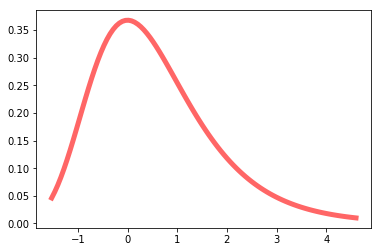

In [123]:
from scipy.stats import gumbel_r
import numpy as np
ax = plt.axes()
x = np.linspace(gumbel_r.ppf(0.01),
                gumbel_r.ppf(0.99), 100)
ax.plot(x, gumbel_r.pdf(x),
        'r-', lw=5, alpha=0.6, label='gumbel_r pdf')


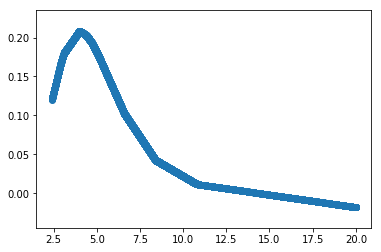

(array([2.4]), array([8.31243124])) 0.045454545454545456


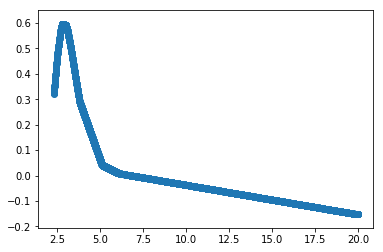

(array([2.3]), array([5.24557456])) 0.037037037037037035


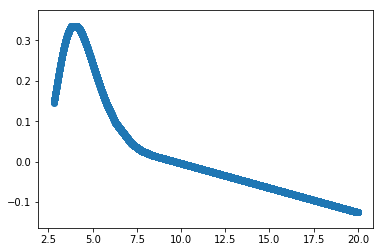

(array([2.8]), array([7.98975898])) 0.022727272727272728


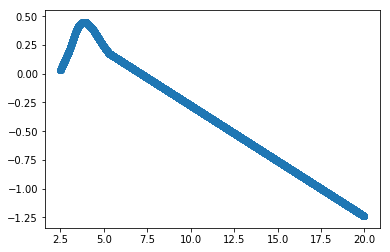

(array([2.5350035]), array([6.68466847])) 0.04347826086956522


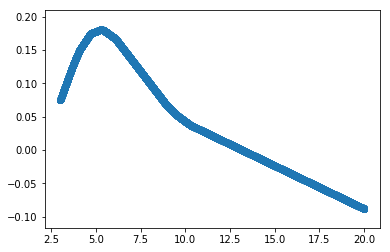

IndexError: index 1 is out of bounds for axis 0 with size 1

In [175]:
iv = 0.1
x = df_rain.groupby('station_id')['rainfall_rate']#.pipe(lambda x: np.argwhere(np.diff(np.sign(x - iv))).flatten()[1])

from scipy import interpolate

def fit_gumbel(x, iv = 0.1):
    params = gumbel_r.fit(x)
    y = gumbel_r.pdf(x, params[0], params[1])
    f = interpolate.interp1d(x, y, fill_value='extrapolate')
    x_new = np.linspace(x.min(), 20, 10000)
    y_new = f(x_new)
    plt.scatter(x_new, y_new)
    plt.show()
    idx = np.argwhere(np.diff(np.sign(y_new - iv)))
    return x_new[idx[0]], x_new[idx[1]]

for name, group in x:
    if group.values.shape[0] > 10:
        # print the data of that regiment
        #print('group', group.values)
        print(fit_gumbel(group.values, 0.1/(group.values.shape[0]/10)), 0.1/(group.values.shape[0]/10))

In [ ]:
df_rain_rate['obs_count'].value_counts().idxmax()